<a href="https://colab.research.google.com/github/Tech-vincent-healtheworld/624096777wenbowang/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


K=2: Mean Absolute Error = 4.1655
K=4: Mean Absolute Error = 4.1828
K=8: Mean Absolute Error = 4.3384
K=16: Mean Absolute Error = 3.7310


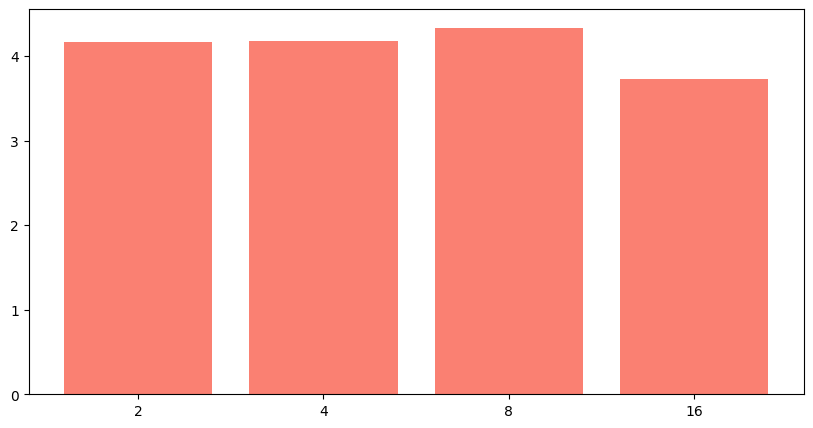

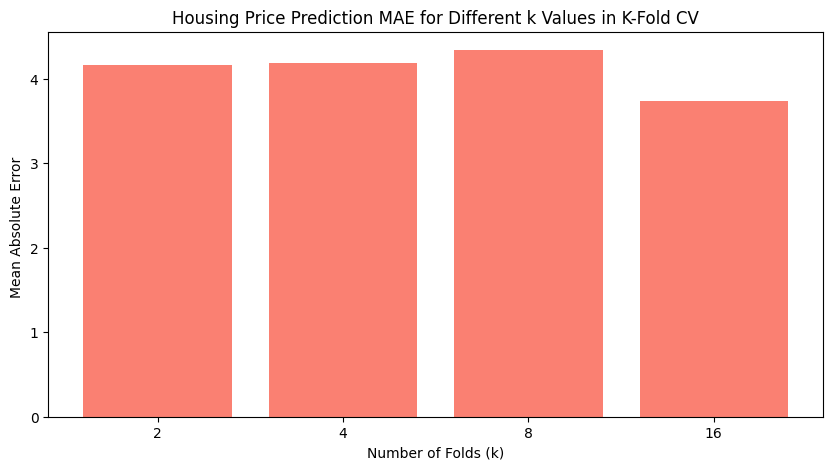

Configuration: Hidden Layers=1, Hidden Units=16, Loss Function=binary_crossentropy, Activation Function=relu -> Test Accuracy:  0.871040
Configuration: Hidden Layers=3, Hidden Units=16, Loss Function=binary_crossentropy, Activation Function=relu -> Test Accuracy:  0.855360
Configuration: Hidden Layers=2, Hidden Units=32, Loss Function=binary_crossentropy, Activation Function=relu -> Test Accuracy:  0.853200
Configuration: Hidden Layers=2, Hidden Units=64, Loss Function=binary_crossentropy, Activation Function=relu -> Test Accuracy:  0.856320
Configuration: Hidden Layers=2, Hidden Units=16, Loss Function=mse, Activation Function=relu -> Test Accuracy:  0.855240
Configuration: Hidden Layers=2, Hidden Units=16, Loss Function=binary_crossentory, Activation Function=tanh -> Test Accuracy:  0.852240


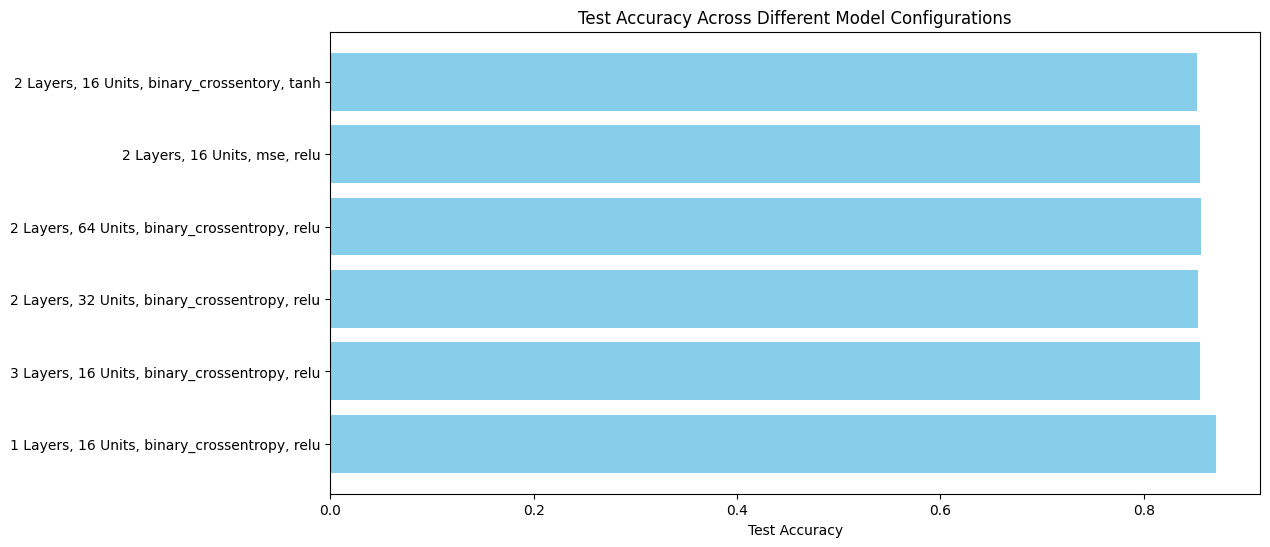

News Train Size: 10%, Optimal Epochs: 36, Test Accuracy:  0.712378
News Train Size: 50%, Optimal Epochs: 17, Test Accuracy:  0.782725
News Train Size: 100%, Optimal Epochs: 11, Test Accuracy:  0.805877


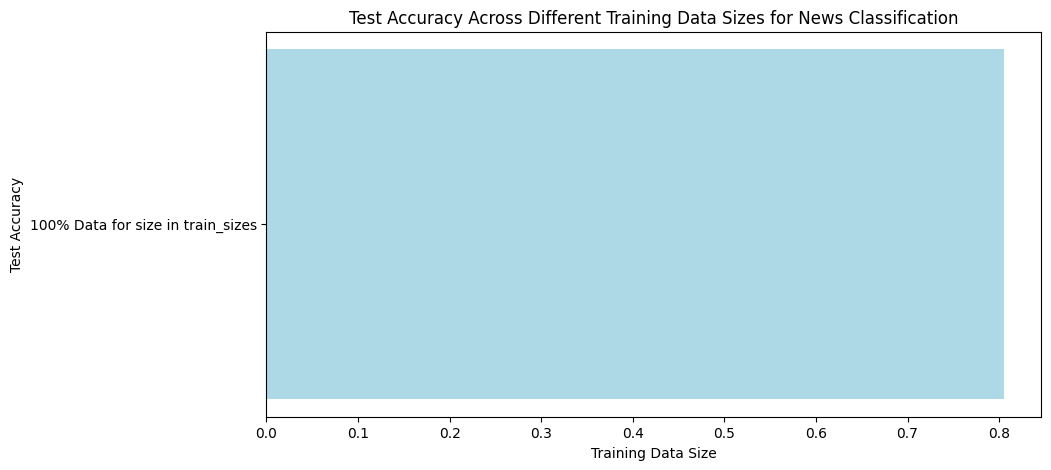

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold


# Load IMDB dataset
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Load Reuters dataset
(news_train_data, news_train_labels), (news_test_data, news_test_labels) = keras.datasets.reuters.load_data(num_words=10000)

# Load Boston Housing dataset
(housing_train_data, housing_train_targets), (housing_test_data, housing_test_targets) = keras.datasets.boston_housing.load_data()









# Convert the dataset into a binary matrix format

def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


# Vectorizing IMDB dataset
x_train_imdb = vectorize_sequences (imdb_train_data)
x_test_imdb = vectorize_sequences (imdb_test_data)
y_train_imdb = np.asarray(imdb_train_labels).astype('float32')
y_test_imdb = np.asarray(imdb_test_labels).astype('float32')

# vectorizing Reuters dataset
x_train_news = vectorize_sequences (news_train_data)
x_test_news = vectorize_sequences (news_test_data)
y_train_news = keras.utils.to_categorical(news_train_labels)
y_test_news = keras.utils.to_categorical(news_test_labels)







# Function to create and evaluate IMDB the model
def build_and_evaluate_model (hidden_layers = 2, hidden_units = 16, loss_function ='binary_crossentropy', activation_function='relu' ):
    model = keras.Sequential()
    model.add (layers.Dense(hidden_units, activation = activation_function, input_shape = (10000,)))

    for _ in range(hidden_layers - 1):
        model.add (layers.Dense(hidden_units, activation = activation_function))

    model.add (layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit (x_train_imdb, y_train_imdb, epochs = 10, batch_size = 512, validation_data = (x_test_imdb, y_test_imdb), verbose = 0)

    test_loss, test_acc = model.evaluate(x_test_imdb, y_test_imdb, verbose = 0)
    return test_acc, history



# Function to create and evaluate the News model
def build_and_evaluate_news_model(train_size = 1.0, epochs = 20):
    subset_size = int(len(x_train_news) * train_size)
    x_train_subset = x_train_news[:subset_size]
    y_train_subset = y_train_news[:subset_size]

    model = keras.Sequential ([
        layers.Dense(64, activation = 'relu', input_shape = (10000,)),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(46, activation = 'softmax')

    ])

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(x_train_subset, y_train_subset, epochs = epochs, batch_size = 512, validation_data=(x_test_news, y_test_news), verbose = 0)

    test_loss, test_acc = model.evaluate(x_test_news, y_test_news, verbose = 0)
    return test_acc, history


# Function to perform K-fold cross-validation on housing dataset
def build_housing_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(housing_train_data.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)

    ])
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'] )
    return model

def evaluate_housing_model(k):
    kf = KFold(n_splits = k, shuffle = True, random_state = 42)
    mae_scores = []

    for train_index, val_index in kf.split(housing_train_data):
        x_train_k, x_val_k = housing_train_data[train_index], housing_train_data[val_index]
        y_train_k, y_val_k = housing_train_targets[train_index], housing_train_targets[val_index]

        model = build_housing_model()
        model.fit(x_train_k, y_train_k, epochs = 100, batch_size = 16, verbose = 0, validation_data = (x_val_k, y_val_k))

        val_mse, val_mae = model.evaluate(x_val_k, y_val_k, verbose = 0)
        mae_scores.append(val_mae)

    return np.mean(mae_scores)







# Test different values of k for K-fold validation
k_values = [2, 4, 8, 16]
housing_results = {}

for k in k_values :
    mae = evaluate_housing_model(k)
    housing_results[k] = mae
    print (f"K={k}: Mean Absolute Error = {mae:.4f}")


# Plot results for Housing dataset
plt.figure (figsize = (10, 5))
plt.bar([str(k)  for k in k_values], [housing_results[k] for k in k_values], color = 'salmon')
# Plot results for Housing dataset
plt.figure (figsize = (10, 5))
plt.bar ([ str(k) for k in k_values], [housing_results[k] for k in k_values], color = 'salmon' )
plt.xlabel ("Number of Folds (k)")
plt.ylabel("Mean Absolute Error ")
plt.title ("Housing Price Prediction MAE for Different k Values in K-Fold CV")
plt.show()







# Test different config
configurations = [
    (1, 16, 'binary_crossentropy', 'relu'),
    (3, 16, 'binary_crossentropy', 'relu'),
    (2, 32, 'binary_crossentropy', 'relu'),
    (2, 64, 'binary_crossentropy', 'relu'),
    (2, 16, 'mse', 'relu'),
    (2, 16, 'binary_crossentory', 'tanh')
]

results = {}

for config in configurations:

    layers_count, units_count, loss_fn, activation_fn = config
    acc, history = build_and_evaluate_model (layers_count, units_count, loss_fn, activation_fn )
    results[config] = acc
    print(f"Configuration: Hidden Layers={layers_count}, Hidden Units={units_count}, Loss Function={loss_fn}, Activation Function={activation_fn} -> Test Accuracy: {acc: 4f}")

# Plot results
labels = [f"{cfg[0]} Layers, {cfg[1]} Units, {cfg[2]}, {cfg[3]}" for cfg in configurations ]
accuracies = [results[cfg] for cfg in configurations]
plt.figure(figsize = (12, 6))
plt.barh (labels, accuracies, color = 'skyblue')
plt.xlabel ("Test Accuracy")
plt.title ("Test Accuracy Across Different Model Configurations")
plt.show()






# Find optimal epochs using early stopping for News model
def find_optimal_epochs(train_size):
    subset_size = int(len(x_train_news) * train_size)
    x_train_subset = x_train_news[:subset_size]
    y_train_subset = y_train_news[:subset_size]

    model = keras.Sequential ([
         layers.Dense(64, activation ='relu', input_shape = (10000,)),
         layers.Dense(64, activation = 'relu'),
         layers.Dense (46, activation = 'softmax')
    ])

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)
    history = model.fit(x_train_subset, y_train_subset, epochs = 50, batch_size = 512, validation_data = (x_test_news, y_test_news), callbacks = [early_stopping], verbose = 0)

    return len (history.epoch)

# Test different dataset sizes for News model
train_sizes = [0.1, 0.5, 1.0]
news_results = {}

for size in train_sizes:
    optimal_epochs = find_optimal_epochs(size)
    acc, history = build_and_evaluate_news_model(train_size = size, epochs = optimal_epochs)
    news_results[size] = acc
    print(f"News Train Size: {int(size * 100)}%, Optimal Epochs: {optimal_epochs}, Test Accuracy: {acc: 4f}")

# Plot results for News classification
labels = [f"{int(size*100)}% Data for size in train_sizes"]
accuracies = [news_results[size] for size in train_sizes]
plt.figure(figsize = (10, 5))
plt.barh(labels, accuracies, color = 'lightblue')
plt.xlabel("Training Data Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Across Different Training Data Sizes for News Classification")
plt.show()






1 Hidden Layer : build_and_evaluate_model(1, 16, 'binary_crossentropy', 'relu')

3 Hidden Layers : build_and_evaluate_model (3, 16, 'binary_crossentropy', 'relu')

32 Hidden Units : build_and_evaluate_model (2, 32, 'binary_crossentropy', 'relu')

64 Hidden Units : build_and_evaluate_model (2, 64, 'binary_crossentorypy', 'relu')

MSE Loss Function : build_and_evaluate_model (2, 16, 'mse', 'relu')

Tanh Activation Function : build_and_evaluate_model ( 2, 16,
'binary_crossentropy', 'tanh')